In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [2]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

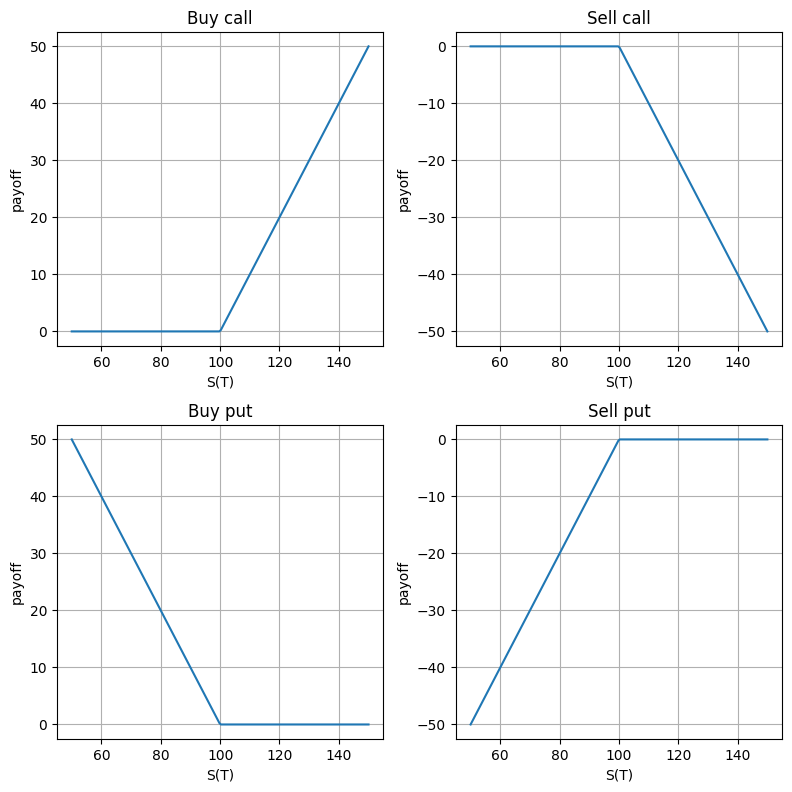

In [3]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


Max Profit: 66.25
Max Loss: -64.75


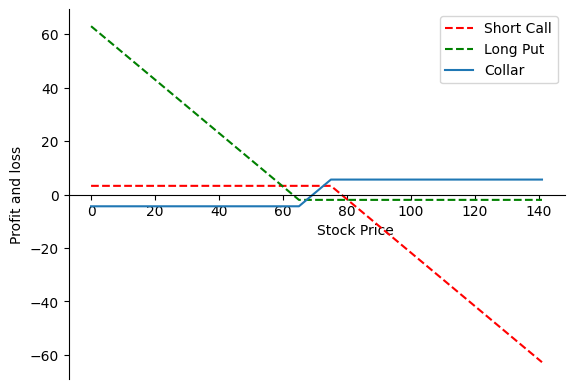

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# IDBI Bank Ltd stock price
spot_price = 70.65
# Long put
strike_price_long_put = 65
premium_long_put = 2
# Short call
strike_price_short_call = 75
premium_short_call = 3.25

# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1)

def call_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, premium,+ premium -sT + strike_price)

payoff_short_call = call_payoff (sT, strike_price_short_call, premium_short_call)

def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

payoff_collar = payoff_short_call + payoff_long_put
print ("Max Profit:", max(payoff_collar))
print ("Max Loss:", min(payoff_collar))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')
ax.plot(sT,payoff_collar+sT-spot_price,label='Collar')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

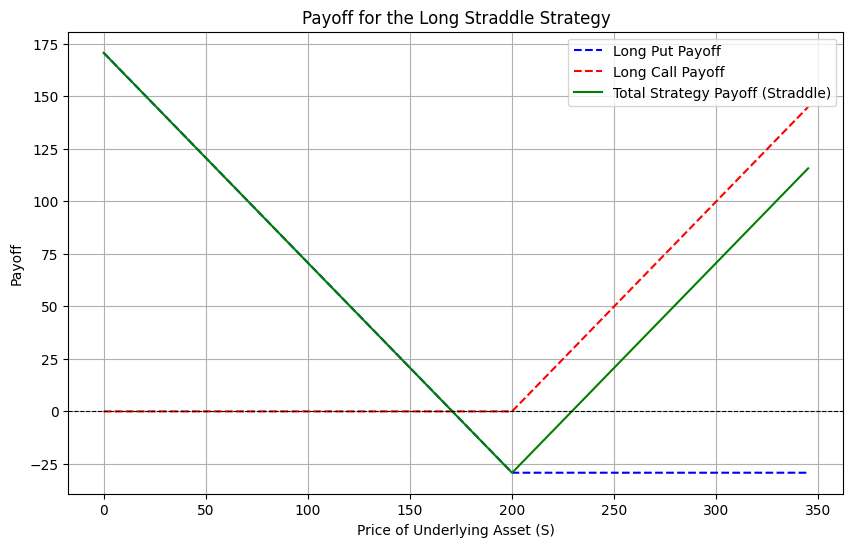

{'Maximum Profit': 170.71,
 'Maximum Loss': -29.099619238476954,
 'Break-even Points': 'None in the analyzed range'}

In [5]:
# Updated parameters for the new strategy
S_current = 172.5

# Long put and call with the same strike price
K = 200
premium_put = 29.25
premium_call = 0.04

# Payoff functions
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

# Strategy components
S = np.linspace(0, 2 * S_current, 500)  # Price range: [0, 2 * S_current]
payoff_call = payoff_buy_call(S, K) - premium_call
payoff_put = payoff_buy_put(S, K) - premium_put

# Total strategy payoff (long straddle)
total_payoff = payoff_call + payoff_put

# Break-even points
break_even_indices = np.where(np.isclose(total_payoff, 0, atol=0.01))[0]
break_even_points = S[break_even_indices]

# Max profit and loss
max_profit = np.max(total_payoff)
max_loss = np.min(total_payoff)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_put, label="Long Put Payoff", linestyle="--", color="blue")
plt.plot(S, payoff_call, label="Long Call Payoff", linestyle="--", color="red")
plt.plot(S, total_payoff, label="Total Strategy Payoff (Straddle)", color="green")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
if len(break_even_points) > 0:
    plt.scatter(break_even_points, np.zeros_like(break_even_points), color="purple", label="Break-even Points")
plt.title("Payoff for the Long Straddle Strategy")
plt.xlabel("Price of Underlying Asset (S)")
plt.ylabel("Payoff")
plt.legend()
plt.grid()
plt.show()

# Output formatted results
formatted_output = {
    "Maximum Profit": "Unlimited (theoretically)" if np.isinf(max_profit) else max_profit,
    "Maximum Loss": max_loss,
    "Break-even Points": break_even_points if len(break_even_points) > 0 else "None in the analyzed range"
}
formatted_output

# Биноминальная модель

In [6]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [7]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


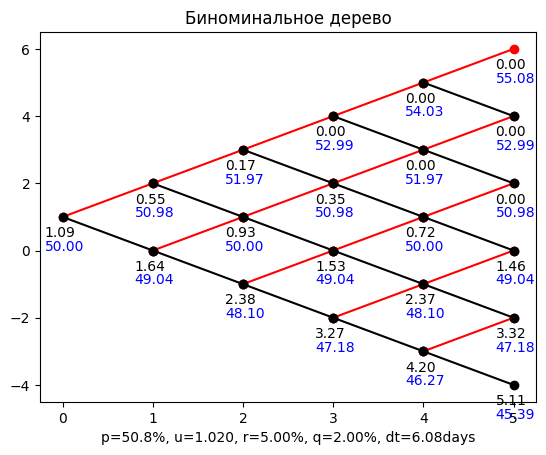

1.0853174417962133

In [8]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.

Биноминальное дерево, европейский опцион колл, функция выплат max(S-K, 0)


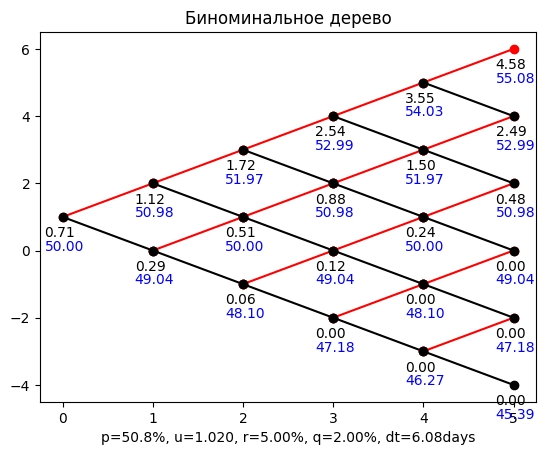

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


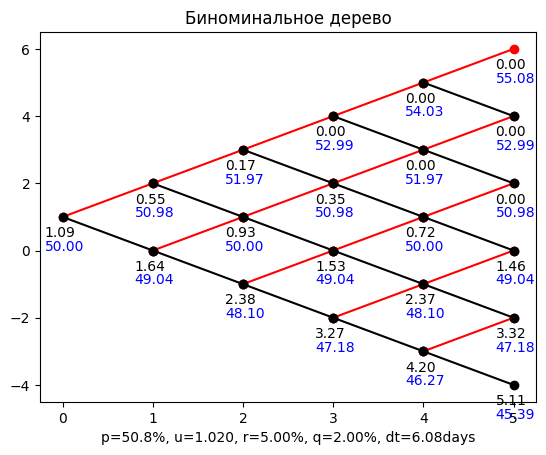

Биноминальное дерево, американский опцион колл, функция выплат max(S-K, 0)


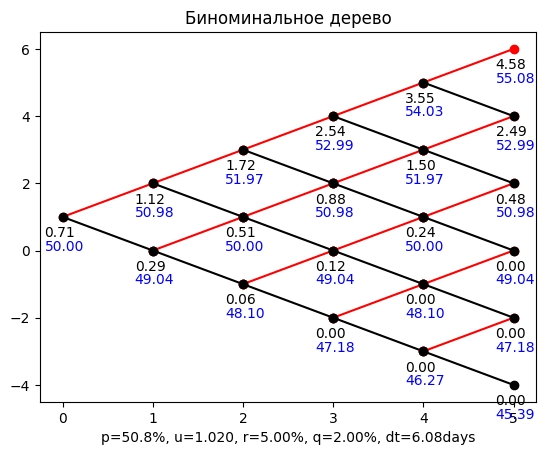

Биноминальное дерево, американский опцион пут, функция выплат max(K-S, 0)


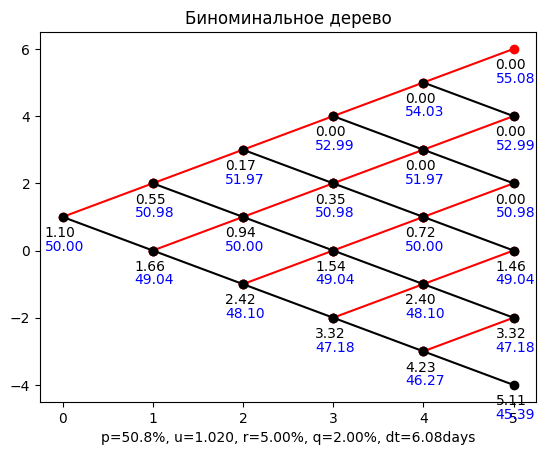

1.0962783164249443

In [9]:
# Задаем параметры
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S * 1.01  # Цена страйк

# Европейский опцион колл
print("Биноминальное дерево, европейский опцион колл, функция выплат max(S-K, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S-K, 0), american=False, showStatePrices=True)

# Европейский опцион пут
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S, 0), american=False, showStatePrices=True)

# Американский опцион колл
print("Биноминальное дерево, американский опцион колл, функция выплат max(S-K, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S-K, 0), american=True, showStatePrices=True)

# Американский опцион пут
print("Биноминальное дерево, американский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S, 0), american=True, showStatePrices=True)

**Выводы на основе биноминальных деревьев для опционов**:

1. **Различие между американскими и европейскими опционами**:
   - **Американские опционы** позволяют досрочное исполнение, что добавляет им стоимости, особенно для пут-опционов. Это видно в биноминальных деревьях, где значения для американских опционов иногда выше европейских в тех же узлах.
   - Для **американского колл-опциона** досрочное исполнение обычно невыгодно, если актив не выплачивает значительных дивидендов. Поэтому цены американского и европейского колл-опциона совпадают (при заданных параметрах $ q = 0.02$).

2. **Особенности европейских опционов**:
   - Европейские опционы могут быть исполнены только в момент истечения, и их стоимость строго определяется ожидаемой дисконтированной ценой на момент $T$. 
   - Цена европейского опциона не учитывает возможности досрочного исполнения, что делает их дешевле, чем американские в большинстве случаев.

3. **Пут-опционы**:
   - Для **американских пут-опционов** возможность досрочного исполнения важна, так как цена актива может резко упасть ниже страйка, что делает немедленное исполнение выгодным.
   - **Европейские пут-опционы** дешевле, так как досрочное исполнение недоступно, даже если это было бы выгодно.

4. **Колл-опционы**:
   - Досрочное исполнение американского колл-опциона, как правило, невыгодно, поэтому его цена мало отличается от европейского колл-опциона.
   - При $q > 0$ (например, если актив платит дивиденды), досрочное исполнение колл-опционов может стать выгодным, особенно ближе к моментам выплат дивидендов.

5. **Общие закономерности биноминальных деревьев**:
   - Биноминальные деревья иллюстрируют эволюцию стоимости опциона в каждом временном шаге, а также подчеркивают влияние волатильности $ \sigma $ и вероятности движения актива вверх $ p $ или вниз $ 1-p $.
   - Чем больше временных шагов $ n $, тем точнее модель отражает реальную стоимость опциона, приближаясь к модели Блэка-Шоулза.

### Практические выводы:
- Американский пут-опцион обычно дороже европейского, так как досрочное исполнение добавляет стоимости.
- Разница между американскими и европейскими колл-опционами минимальна при низких дивидендах.
- Построение биноминальных деревьев полезно для визуализации и интуитивного понимания механизма оценки опционов.

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [10]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [11]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [12]:
# оценка опциона пут
def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)


In [13]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [14]:
from scipy.stats import norm

# Параметры опциона
S0 = 100  # текущая цена актива
K = 100   # цена исполнения
T = 1     # время до экспирации (в годах)
sigma = 0.2  # волатильность
r = 0.05  # безрисковая ставка
q = 0.02  # ставка дивидендов

# Форматирование вывода параметров
params = f"r = {r}, sigma = {sigma}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

# Расчеты
call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)

put_price = put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

# Оценка пут-опциона через паритет
put_parity_price = put_paritet(S0, K, T, sigma, r, q)
print('Оценка опциона пут через паритет =', put_parity_price)

# Сравнение разницы
print(f"Разница между прямой оценкой и через паритет: {abs(put_price - put_parity_price):.4e}")


Параметры: r = 0.05, sigma = 0.2, T = 1, S0 = 100, K = 100
Оценка опциона колл = 9.18957439496554
Оценка опциона пут = 6.292649514361422
Оценка опциона пут через паритет = 4.312516845036953
Разница между прямой оценкой и через паритет: 1.9801e+00


In [15]:
# params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
# print('Параметры:', params)

# call_price = call(S0, K, T, sigma, r, q)
# print('Оценка опциона колл =', call_price)
# put_price  =  put(S0, K, T, sigma, r, q)
# print('Оценка опциона пут =', put_price)

## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [16]:
def greeks(S0, k, r, sigma, T, t):
    x = np.linspace(500, 1200, 1000)  # Диапазон цен
    tau = T - t
    
    a_plus = (np.log(x / k) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    a_minus = (np.log(x / k) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    

   
    
    delta = norm.cdf(a_plus) # производная по x
    gamma = norm.pdf(a_plus) / (x * sigma * np.sqrt(tau)) # вторая производная по x (скорость изменения дельты)
    theta = -r * k * np.exp(-r * tau) * norm.cdf(a_minus) - (sigma * x / (2 * np.sqrt(tau))) * norm.pdf(a_plus) # производная по t ("затухание по времени")
    vega = x * np.sqrt(tau) / np.sqrt(2*np.pi) * np.exp(-0.5 * a_plus**2 ) # производная по sigma (чуствительность к волатильности)

    rho =  k * tau * np.exp(-r * tau) * norm.cdf(a_minus) # производная по K 
    # kappa = -((np.exp(-r * tau)) / (x * sigma * np.sqrt(tau)) * norm.pdf(a_minus)) # производная дельты по x (измеряет мгновенную скорость изменения дельты с течением времени)
    kappa = - np.exp(-r * tau) * norm.pdf(a_minus)
    return x, delta, theta, gamma, vega, rho, kappa

Графики зависимости греческих характеристик для опционов от цены базового актива.

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# N = 1000
# x_data = np.linspace(S0 - S0/4, S0+S0/4, N)
# cp_data = np.zeros((6, N))

S0 = 1000  # Начальная цена актива
k = 1000   # Стоимость исполнения
r = 0.05  # Годовая безрисковая ставка
sigma = 0.2  # Волатильность
T = 1     # Время до исполнения
t = 0.5   # Текущее время


x, delta, theta, gamma, vega, rho, kappa = greeks(S0, k, r, sigma, T, t)

fig = make_subplots(rows=3, cols=2, subplot_titles=('Delta', 'Theta', 'Gamma', 'Vega', 'Rho', 'Kappa'))

fig.add_trace(go.Scatter(x=x, y=delta, mode='lines', name='Delta'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=theta, mode='lines', name='Theta'), row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=gamma, mode='lines', name='Gamma'), row=2, col=1)
fig.add_trace(go.Scatter(x=x, y=vega, mode='lines', name='Vega'), row=2, col=2)
fig.add_trace(go.Scatter(x=x, y=rho, mode='lines', name='Rho'), row=3, col=1)
fig.add_trace(go.Scatter(x=x, y=kappa, mode='lines', name='Kappa'), row=3, col=2)

fig.update_layout(
    title='Греческие параметры как функции от текущей цены актива',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    width=1000,
    height=700
)

for i in range(1, 4):
    fig.update_xaxes(title_text='Текущая цена актива (X)', row=i)
    fig.update_yaxes(title_text='Значение грека', row=i, col=1)

fig.show()

print('delta - измеряет скорость изменения теоретической стоимости опциона по отношению к изменениям цены базового актива')
print('gamma - измеряет скорость изменения дельты по отношению к изменениям базовой цены')
print('theta - измеряет чувствительность стоимости производной к течению времени: "затухание во времени"')
print('vega - измеряет чувствительность к волатильности')
print('rho - измеряет чувствительность к процентной ставке')
print('kappa - измеряет чувствительность к страйку')

delta - измеряет скорость изменения теоретической стоимости опциона по отношению к изменениям цены базового актива
gamma - измеряет скорость изменения дельты по отношению к изменениям базовой цены
theta - измеряет чувствительность стоимости производной к течению времени: "затухание во времени"
vega - измеряет чувствительность к волатильности
rho - измеряет чувствительность к процентной ставке
kappa - измеряет чувствительность к страйку


Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определение численных производных
def compute_first_derivative(func, point, step=0.001):
    return (func(point + step) - func(point - step)) / (2 * step)

def compute_second_derivative(func, point, step=0.001):
    return (func(point + step) - 2 * func(point) + func(point - step)) / (step ** 2)

# Формула Блэка-Шоулза для стоимости колл-опциона
def black_scholes_call(S, K, T, r, sigma, q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Фиксация параметров для производных
def call_price_s(S_var):
    return black_scholes_call(S_var, K, T, r, sigma)

def call_price_t(T_var):
    return black_scholes_call(S, K, T_var, r, sigma)

def call_price_sigma(sig_var):
    return black_scholes_call(S, K, T, r, sig_var)

def call_price_r(r_var):
    return black_scholes_call(S, K, T, r_var, sigma)

# Параметры опциона
S = 100  
K = 100  
T = 1.0  
r = 0.07 
sigma = 0.3  

# Вычисление греческих коэффициентов численно
delta_approx = compute_first_derivative(call_price_s, S)
gamma_approx = compute_second_derivative(call_price_s, S)
theta_approx = compute_first_derivative(call_price_t, T)
vega_approx = compute_first_derivative(call_price_sigma, sigma)
rho_approx = compute_first_derivative(call_price_r, r)

# Вычисление греческих коэффициентов аналитически
delta_exact = norm.cdf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)))
gamma_exact = norm.pdf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))) / (S * sigma * np.sqrt(T))
theta_exact = -S * norm.pdf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))) * sigma / (2 * np.sqrt(T)) \
              - r * K * np.exp(-r * T) * norm.cdf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) - sigma * np.sqrt(T))
vega_exact = S * norm.pdf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))) * np.sqrt(T)
rho_exact = K * T * np.exp(-r * T) * norm.cdf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) - sigma * np.sqrt(T))

# Результаты
print(f"Delta: численное = {delta_approx}")
print(f"Gamma: численное = {gamma_approx}")
print(f"Theta: численное = {theta_approx}")
print(f"Vega: численное = {vega_approx}")
print(f"Rho: численное = {rho_approx}")

# # Данные для графика
# metrics = ['Delta', 'Gamma', 'Theta', 'Vega', 'Rho']
# numerical = [delta_approx, gamma_approx, theta_approx, vega_approx, rho_approx]
# analytical = [delta_exact, gamma_exact, theta_exact, vega_exact, rho_exact]

# # Построение графика
# plt.figure(figsize=(10, 6))

# for i, metric in enumerate(metrics):
#     plt.scatter(i, numerical[i], label=f'{metric} (численное)', color='blue', marker='o')
#     plt.scatter(i, analytical[i], label=f'{metric} (аналитическое)', color='red', marker='x')

# # Подписи осей и заголовок
# plt.xticks(range(len(metrics)), metrics)
# plt.ylabel('Значение')
# plt.title('Сравнение численных и аналитических греческих коэффициентов')

# # Удаление повторяющихся легенд
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# plt.grid()
# plt.tight_layout()
# plt.show()

Delta: численное = 0.6492636864727785
Gamma: численное = 0.012356089484910626
Theta: численное = 9.040341361252757
Vega: численное = 37.06818625187225
Rho: численное = 49.715829394692435


Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

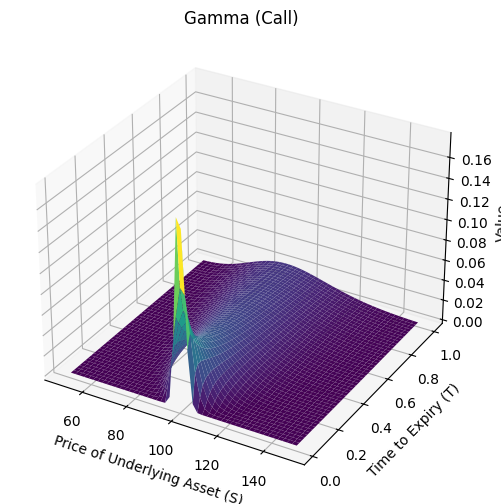

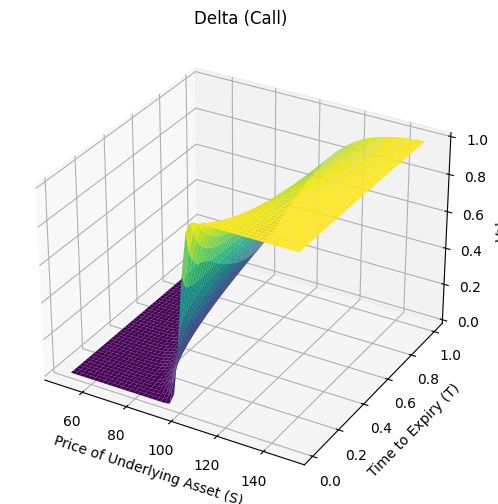

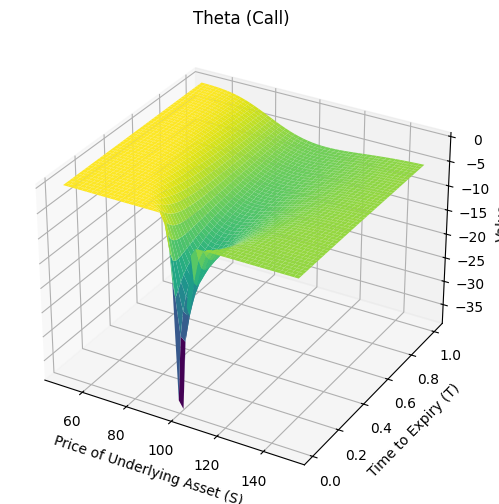

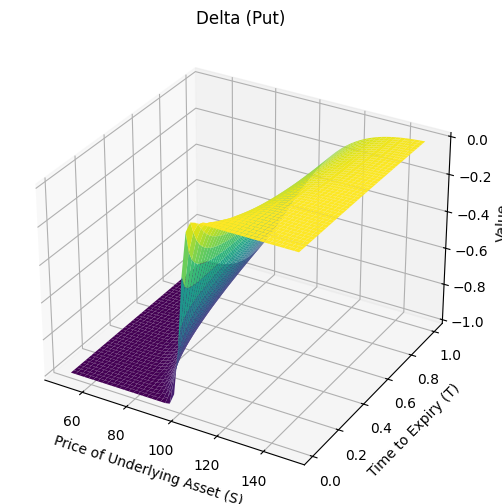

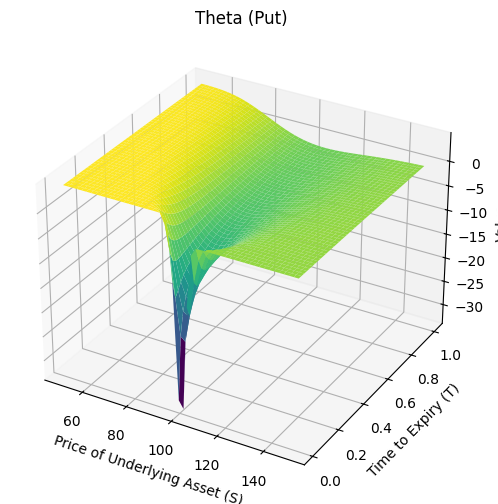

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Определение параметров
K = 100
r = 0.05
sigma = 0.2

# Функции для расчета греков
def calculate_d1(S, T, K, r, sigma):
    return (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def calculate_d2(d1, sigma, T):
    return d1 - sigma * np.sqrt(T)

def delta_call(S, T, K, r, sigma):
    d1 = calculate_d1(S, T, K, r, sigma)
    return norm.cdf(d1)

def delta_put(S, T, K, r, sigma):
    d1 = calculate_d1(S, T, K, r, sigma)
    return norm.cdf(d1) - 1

def gamma(S, T, K, r, sigma):
    d1 = calculate_d1(S, T, K, r, sigma)
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta_call(S, T, K, r, sigma):
    d1 = calculate_d1(S, T, K, r, sigma)
    d2 = calculate_d2(d1, sigma, T)
    term1 = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
    return term1 + term2

def theta_put(S, T, K, r, sigma):
    d1 = calculate_d1(S, T, K, r, sigma)
    d2 = calculate_d2(d1, sigma, T)
    term1 = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r * T) * norm.cdf(-d2)
    return term1 + term2

# Функция для построения 3D-графика
def plot_3d(S_range, T_range, greek_function, title):
    S_grid, T_grid = np.meshgrid(S_range, T_range)
    Z = greek_function(S_grid, T_grid, K, r, sigma)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(S_grid, T_grid, Z, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel('Price of Underlying Asset (S)')
    ax.set_ylabel('Time to Expiry (T)')
    ax.set_zlabel('Value')
    plt.show()

# Диапазоны значений
S_range = np.linspace(50, 150, 50)
T_range = np.linspace(0.01, 1.0, 50)

# Построение графика для Gamma
plot_3d(S_range, T_range, gamma, "Gamma (Call)")
plot_3d(S_range, T_range, delta_call, "Delta (Call)")
plot_3d(S_range, T_range, theta_call, "Theta (Call)")
plot_3d(S_range, T_range, delta_put, "Delta (Put)")
plot_3d(S_range, T_range, theta_put, "Theta (Put)")



# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

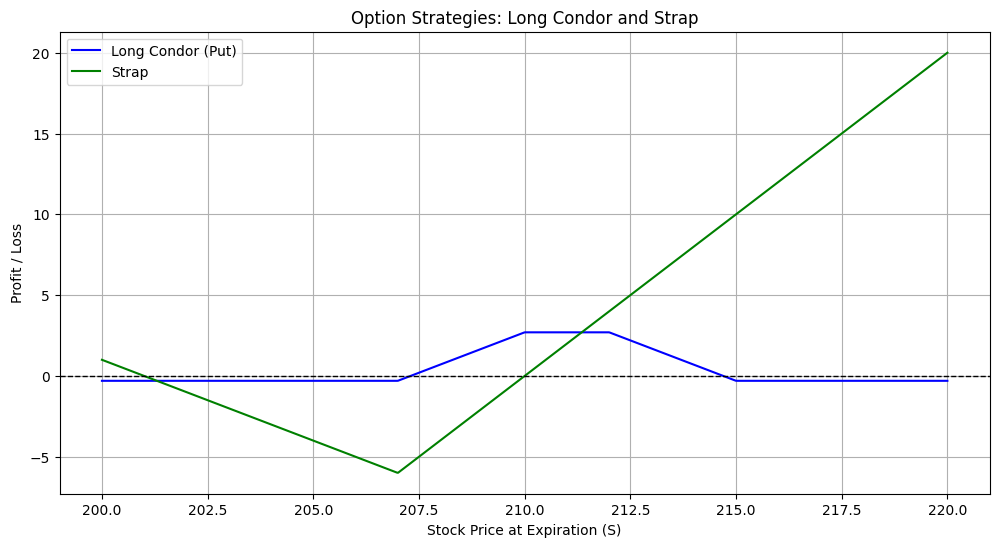

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Страйки
strike_A = 207
strike_B = 210
strike_C = 212
strike_D = 215

# Цена базового актива на момент истечения
S = np.linspace(200, 220, 1000)  # Диапазон цен

premium_A, premium_B, premium_C, premium_D = 2.0, 1.5, 1.2, 1.0

# Функции выплат для колл и пут опционов
def call_payoff(S, strike):
    return np.maximum(S - strike, 0)

def put_payoff(S, strike):
    return np.maximum(strike - S, 0)

# 1. Long Condor (используем опционы пут)
def long_condor_put(S, strike_A, strike_B, strike_C, strike_D, premium_A, premium_B, premium_C, premium_D):
    payoff_A = put_payoff(S, strike_A) - premium_A  # Лонг пут A
    payoff_B = -(put_payoff(S, strike_B) - premium_B)  # Шорт пут B
    payoff_C = -(put_payoff(S, strike_C) - premium_C)  # Шорт пут C
    payoff_D = put_payoff(S, strike_D) - premium_D  # Лонг пут D
    return payoff_A + payoff_B + payoff_C + payoff_D

# 2. Strap
def strap(S, strike_A, premium_A):
    payoff_call_1 = call_payoff(S, strike_A) - premium_A  # Лонг колл A
    payoff_call_2 = call_payoff(S, strike_A) - premium_A  # Лонг колл A
    payoff_put = put_payoff(S, strike_A) - premium_A  # Лонг пут A
    return payoff_call_1 + payoff_call_2 + payoff_put

# Рассчитываем выплаты
payoff_long_condor = long_condor_put(S, strike_A, strike_B, strike_C, strike_D, premium_A, premium_B, premium_C, premium_D)
payoff_strap = strap(S, strike_A, premium_A)

# Визуализация
plt.figure(figsize=(12, 6))

# Long Condor
plt.plot(S, payoff_long_condor, label="Long Condor (Put)", color="blue")

# Strap
plt.plot(S, payoff_strap, label="Strap", color="green")

# Настройки графика
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.title("Option Strategies: Long Condor and Strap")
plt.xlabel("Stock Price at Expiration (S)")
plt.ylabel("Profit / Loss")
plt.legend()
plt.grid()
plt.show()

### **1. Влияние соотношения $S$ и $ K $**

#### Для опциона **колл**:
- **$ S > K $** (ITM): 
  Опцион имеет внутреннюю стоимость, и владелец опциона может получить прибыль, реализовав право купить базовый актив по цене $ K $, ниже рыночной.
  
- **$ S = K $** (ATM): 
  Внутренняя стоимость равна нулю, но опцион может быть дорогим из-за временной стоимости.

- **$ S < K $** (OTM): 
  Опцион не имеет внутренней стоимости. Убыток ограничен уплаченной премией.

#### Для опциона **пут**:
- **$ S < K $** (ITM): 
  Опцион имеет внутреннюю стоимость, и владелец может получить прибыль, продав актив по цене $ K $, выше рыночной.

- **$ S = K $** (ATM): 
  Внутренняя стоимость равна нулю, но временная стоимость сохраняется.

- **$ S > K $** (OTM): 
  Опцион не имеет внутренней стоимости. Убыток ограничен уплаченной премией.

---

### **2. Анализ Long Condor**

#### Максимальная прибыль:
- Возникает, если $ S $ находится между страйками $ B = 210 $ и $ C = 212 $.
- Максимальная прибыль равна разнице премий на продажу и покупку опционов:
  $
  \text{Макс. прибыль} = (K_C - K_B) - (\text{Премия}_A + \text{Премия}_D - \text{Премия}_B - \text{Премия}_C)
  $

#### Максимальный убыток:
- Возникает, если $ S \leq K_A $ или $ S \geq K_D $, так как оба купленных опциона бесполезны.
- Максимальный убыток равен общей стоимости входа в стратегию:
  $
  \text{Макс. убыток} = \text{Премия}_A + \text{Премия}_D - \text{Премия}_B - \text{Премия}_C
  $

#### Интервал безубыточности:
- Безубыточность наступает, если $ S $ выходит за пределы премий, но не попадает в зону убытков:
  $
  K_A + \text{сумма премий} \leq S \leq K_D - \text{сумма премий}.
  $

---

### **3. Анализ Strap**

#### Максимальная прибыль:
- **При росте цены ($ S \gg K $)**:
  Прибыль не ограничена, так как владелец имеет два опциона колл.
  
- **При падении цены $( S \ll K )$**:
  Прибыль ограничена разницей между страйком и премией, умноженной на опцион пут.

#### Максимальный убыток:
- Убыток ограничен суммой премий, уплаченных за опционы:
  $
  \text{Макс. убыток} = 2 \cdot \text{Премия}_{\text{call}} + \text{Премия}_{\text{put}}
  $

#### Интервал безубыточности:
- Интервал включает цены, при которых прибыль от движения цены компенсирует уплаченные премии. Например:
  $
  S \leq K - \text{сумма премий} \quad \text{или} \quad S \geq K + \text{сумма премий}.
  $

In [21]:
# Рассчёт параметров для анализа

# Определяем цену базового актива при максимальном росте
S_max = 2 * strike_D  # Цена в 2 раза выше максимального страйка

# Максимальная прибыль и убыток для Long Condor
max_profit_long_condor = (strike_C - strike_B) - (premium_A + premium_D - premium_B - premium_C)
max_loss_long_condor = premium_A + premium_D - premium_B - premium_C

# Интервал безубыточности для Long Condor
breakeven_low_condor = strike_A + max_loss_long_condor  # Нижняя граница безубыточности
breakeven_high_condor = strike_D - max_loss_long_condor  # Верхняя граница безубыточности

# Максимальная прибыль и убыток для Strap
max_loss_strap = 2 * premium_A + premium_A  # Сумма премий
# Прибыль не ограничена при движении цены, считаем только убыток

# Интервал безубыточности для Strap
breakeven_low_strap = strike_A - max_loss_strap  # Нижняя граница
breakeven_high_strap = strike_A + max_loss_strap  # Верхняя граница

{
    "Long Condor": {
        "Max Profit": max_profit_long_condor,
        "Max Loss": max_loss_long_condor,
        "Breakeven Range": (breakeven_low_condor, breakeven_high_condor)
    },
    "Strap": {
        "Max Profit": "Unlimited",
        "Max Loss": max_loss_strap,
        "Breakeven Range": (breakeven_low_strap, breakeven_high_strap)
    }
}

{'Long Condor': {'Max Profit': 1.7,
  'Max Loss': 0.30000000000000004,
  'Breakeven Range': (207.3, 214.7)},
 'Strap': {'Max Profit': 'Unlimited',
  'Max Loss': 6.0,
  'Breakeven Range': (201.0, 213.0)}}

### **Пример расчётов с $ S_{\text{max}} = 2K $ и премиями**
Рассчитаем численно максимальную прибыль, убыток и интервалы безубыточности для данных стратегий.

### Результаты анализа

#### **Long Condor**
- **Максимальная прибыль:** $ 1.7 $ (если цена $ S $ между $ 210 $ и $ 212 $).
- **Максимальный убыток:** $ 0.3 $ (если $ S \leq 207 $ или $ S \geq 215 $).
- **Интервал безубыточности:** от $ 207.3 $ до $ 214.7 $.

#### **Strap**
- **Максимальная прибыль:** Не ограничена (если цена существенно изменится).
- **Максимальный убыток:** $ 6.0 $ (уплаченные премии).
- **Интервал безубыточности:** от $ 201.0 $ до $ 213.0 $. 

## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $X=\{X_c, X_p\}$,

где
$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$
$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

Оптимальные контракты (Call): [-7. -7. -7. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Оптимальные контракты (Put): [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. -5. -7. -7. -7.]
Общая стоимость стратегии: 266.65
Прибыль при росте цены: 3305.5999999999985
Прибыль при падении цены: 2286.600000000003
Средняя прибыль: 2796.100000000001


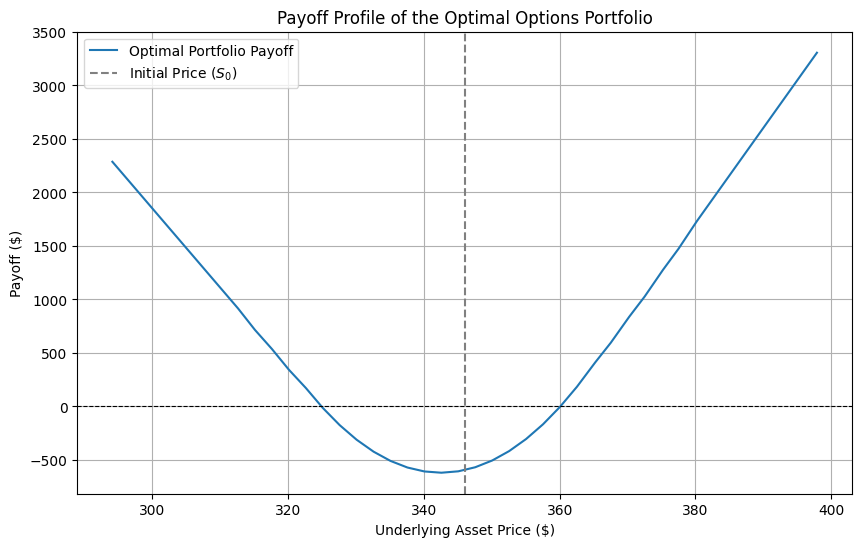

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

class OptionPortfolioOptimizer:
    """
    Класс для оптимизации портфеля опционов.
    """
    def __init__(self, S0, x_pct, y_pct, budget, L, U):
        self.S0 = S0
        self.x_pct = x_pct
        self.y_pct = y_pct
        self.budget = budget
        self.L = L
        self.U = U
        self.result = {}

    def optimize(self, option_call, option_put):
        strikes_call = np.array(option_call['strike'])
        strikes_put = np.array(option_put['strike'])
        ask_call = np.array(option_call['ask_call'])
        ask_put = np.array(option_put['ask_put'])

        # Допустимые уровни цены базового актива
        ST_up = self.S0 * (1 + self.x_pct)
        ST_down = self.S0 * (1 - self.x_pct)

        # Максимально допустимый убыток
        L_max = self.y_pct * self.S0

        # Определение переменных
        n_call = len(strikes_call)
        n_put = len(strikes_put)
        x_c = cp.Variable(n_call, integer=True)
        x_p = cp.Variable(n_put, integer=True)

        # Профиль доходов
        profit_call_up = cp.sum(cp.multiply(x_c, cp.pos(ST_up - strikes_call)))
        profit_call_down = cp.sum(cp.multiply(x_c, cp.pos(ST_down - strikes_call)))

        profit_put_up = cp.sum(cp.multiply(x_p, cp.pos(strikes_put - ST_up)))
        profit_put_down = cp.sum(cp.multiply(x_p, cp.pos(strikes_put - ST_down)))

        payoff_up = profit_call_up + profit_put_up
        payoff_down = profit_call_down + profit_put_down

        # Стоимость стратегии
        total_cost = cp.sum(cp.multiply(x_c, ask_call)) + cp.sum(cp.multiply(x_p, ask_put))

        # Ограничения
        constraints = [
            total_cost <= self.budget,
            x_c >= self.L, x_c <= self.U,
            x_p >= self.L, x_p <= self.U,
            payoff_up >= -L_max,
            payoff_down >= -L_max
        ]

        # Целевая функция
        objective = cp.Maximize((payoff_up + payoff_down) / 2 - total_cost)
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Сохранение результатов
        self.result = {
            "optimal_call": x_c.value,
            "optimal_put": x_p.value,
            "total_cost": total_cost.value,
            "payoff_up": payoff_up.value,
            "payoff_down": payoff_down.value,
            "average_payoff": (payoff_up.value + payoff_down.value) / 2,
            "strikes_call": strikes_call,
            "strikes_put": strikes_put,
        }
        return self.result

    def plot_payoff(self):
        if not self.result:
            raise ValueError("Результаты оптимизации отсутствуют. Выполните метод optimize().")

        price_range = np.linspace(self.S0 * (1 - self.x_pct), self.S0 * (1 + self.x_pct), 500)
        payoff = np.zeros_like(price_range)

        optimal_call = self.result["optimal_call"]
        optimal_put = self.result["optimal_put"]
        strikes_call = self.result["strikes_call"]
        strikes_put = self.result["strikes_put"]

        for i, K in enumerate(strikes_call):
            payoff += optimal_call[i] * np.maximum(price_range - K, 0)

        for i, K in enumerate(strikes_put):
            payoff += optimal_put[i] * np.maximum(K - price_range, 0)

        plt.figure(figsize=(10, 6))
        plt.plot(price_range, payoff, label="Optimal Portfolio Payoff")
        plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
        plt.axvline(self.S0, color="gray", linestyle="--", label="Initial Price ($S_0$)")
        plt.title("Payoff Profile of the Optimal Options Portfolio")
        plt.xlabel("Underlying Asset Price ($)")
        plt.ylabel("Payoff ($)")
        plt.legend()
        plt.grid(True)
        plt.show()



option_call = {
    "strike": [312.50, 317.50, 322.50, 327.50, 332.50, 337.50, 342.50, 347.50, 352.50, 357.50, 362.50, 367.50, 372.50, 377.50],
    "ask_call": [34.85, 30.25, 25.80, 21.60, 17.70, 14.20, 11.20, 8.70, 6.65, 5.05, 3.80, 2.81, 2.09, 1.55],
    "bid_call": [34.05, 29.55, 25.10, 20.90, 17.35, 13.90, 11.00, 8.50, 6.50, 4.90, 3.65, 2.72, 2.03, 1.49]
}

option_put = {
    "strike": [315.00, 320.00, 325.00, 330.00, 335.00, 340.00, 345.00, 350.00, 355.00, 360.00, 365.00, 370.00, 375.00, 380.00],
    "ask_put": [1.00, 1.49, 2.20, 3.20, 4.55, 6.40, 8.65, 11.45, 14.70, 18.30, 22.25, 26.95, 31.35, 35.80],
    "bid_put": [0.97, 1.44, 2.14, 3.10, 4.45, 6.25, 8.50, 11.25, 14.40, 17.95, 21.85, 25.40, 29.80, 34.70]
}

optimizer = OptionPortfolioOptimizer(S0=346, x_pct=0.15, y_pct=0.05, budget=270, L=-7, U=10)
result = optimizer.optimize(option_call, option_put)

print("Оптимальные контракты (Call):", result["optimal_call"])
print("Оптимальные контракты (Put):", result["optimal_put"])
print("Общая стоимость стратегии:", result["total_cost"])
print("Прибыль при росте цены:", result["payoff_up"])
print("Прибыль при падении цены:", result["payoff_down"])
print("Средняя прибыль:", result["average_payoff"])

optimizer.plot_payoff()